In [3]:
from IPython.display import Image, SVG
from importlib import reload

# Теория по ООП

---
1. (4) Опишите в файле `basic_oop.md` своими словами следующие принципы:
  - Объект;
  - Инкапсуляция;
  - Полиморфизм;
  - Наследование;

>`basic_oop.md`
- Языки, поддерживающие объектно-ориентированное программирование (ООП), обычно используют наследование для повторного использования кода и расширяемости в форме классов или прототипов. Те, кто использует классы, поддерживают две основные концепции:

 - Классы - определения формата данных и доступных процедур для данного типа или класса объекта; могут также содержать сами данные и процедуры (известные как методы класса), т.е. классы содержат элементы данных и функции-члены
 - **Объекты** - экземпляры классов

Иногда объекты соответствуют вещам, которые можно найти в реальном мире. Например, графическая программа может иметь такие объекты, как «круг», «квадрат», «меню». В системе покупок в Интернете могут быть такие объекты, как «корзина», «покупатель» и «продукт». Иногда объекты представляют собой более абстрактные сущности, такие как объект, представляющий открытый файл, или объект, который предоставляет услугу перевода измерений из общепринятых в США в метрики.

- В объектно-ориентированном программировании (ООП) **инкапсуляция** означает связывание данных с методами, которые работают с этими данными, или ограничение прямого доступа к некоторым компонентам объекта. Инкапсуляция используется, чтобы скрыть значения или состояние объекта структурированных данных внутри класса, предотвращая прямой доступ к ним неавторизованных сторон. В классе обычно предоставляются общедоступные методы (так называемые «геттеры» и «сеттеры») для доступа к значениям, а другие клиентские классы вызывают эти методы для извлечения и изменения значений внутри объекта.
- В языках программирования и теории типов **полиморфизм** - это предоставление единого интерфейса для сущностей разных типов или использование одного символа для представления нескольких различных типов.
- В объектно-ориентированном программировании **наследование** - это механизм базирования объекта или класса на другом объекте (наследование на основе прототипов) или классе (наследование на основе классов) с сохранением аналогичной реализации. Также определяется как создание новых классов (подклассов) из существующих, таких как суперкласс или базовый класс, с последующим формированием их в иерархию классов. В большинстве объектно-ориентированных языков на основе классов объект, созданный посредством наследования, «дочерний объект», приобретает все свойства и поведение «родительского объекта», за исключением: конструкторов, деструктора, перегруженных операторов и дружественных функций базового класса.

##### Friend function ([Wiki](https://en.wikipedia.org/wiki/Friend_function))

In [26]:
import numpy as np
X = np.array([[1, 2, 3], [4, 5, 6]])

In [27]:
X.transpose()

array([[1, 4],
       [2, 5],
       [3, 6]])

In [28]:
np.transpose(X)

array([[1, 4],
       [2, 5],
       [3, 6]])

Функция `np.transpose` - _дружественная_ к классу `numpy.ndarray`. В python нет специального `friend` декларирования методов класса, использующих приватные переменные другого класса.

---
2. (3) Опишите в файле `solid.md` своими словами три первых принципа SOLID:
  - Single responsibility;
  - Open-close;
  - Liskov substitution.

>`solid.md`
- **Single-responsibility principle** (SRP) - это принцип компьютерного программирования, который гласит, что каждый модуль, класс или функция в компьютерной программе должны нести ответственность за отдельную часть функциональности этой программы, которую она должна инкапсулировать. Все службы этого модуля, класса или функции должны строго соответствовать этой ответственности.
- В объектно-ориентированном программировании **open–closed principle** гласит: «программные объекты (классы, модули, функции и т. Д.) Должны быть открыты для расширения, но закрыты для модификации»; то есть такая сущность может позволить расширить свое поведение без изменения исходного кода.
- Substitutability (**Liskov substitution principle**) - это принцип объектно-ориентированного программирования, гласящий, что в компьютерной программе, если S является подтипом T, тогда объекты типа T могут быть заменены объектами типа S (т. Е. объект типа T может быть заменен любым объектом подтипа S) без изменения каких-либо желаемых свойств программы (правильность, выполненная задача и т. д.).

---
3. (3) Посмотрите на файл `bad_solid.py`.
Какие из первых трех принципов SOLID в нем нарушены?
Опишите это в `bad_solid.md`.

Contents of `bad_solid.py`
```py
class Administator:
    def prepare_documents(self):
        # все правильно, этим он и занимается
        return 'done'

    def water_flowers(self):
        # ну, пусть поливает цветочки
        return 'done'

    def repair_car(self):
        # погодите, что?
        return 'done'

    def clean_floor(self):
        # нет, это уже работа для уборщика
        return 'done'

    def perform_surgery(self):
        # но он ведь не доктор, эй!
        return 'done'


class Student(Administator):
    # постойте, мы правда хотим наследовать все эти ненужные методы?

    def method_only_for_student(self):
        return 'hehe, administrator cannot call me'

    def repair_car(self):
        method_only_for_student()
        return done


```

- **Single-responsibility principle**. В данном примере `Administrator` содержит много методов, которые выполняют совершенно разные функции, не имеющие общей цели. Наверное лучше было сделать класс `Worker` с методом `do_the_job`, а от него подклассы `Administrator`, `Doctor`, `Janitor` с методами, специфичными каждой работе.
- **Open–closed principle**. Из-за многофункциональности `Administrator`а не совсем понятно, каким образом можно его дополнить, сделав из него дочерний расширенный класс. Так что нельзя сказать, что класс `Administrator` "открыт".
- **Liskov substitution principle**. Всё плохо. `Student` унаследовал всё. `prepare_documents` например неясно что делает на классе `Student` - мы не можем ожидать, что этот метод будет выполнять аналогичную задачу у студентов, скорее всего нам нужно будет все лишние методы перезаписать.
> Меня ударили доской - лежу я с болью и тоской.

![Wasted](wasted.jpg)

# Практика по ООП в Python

---
4. (3) Напишите программу, которая объявляет класс `Shape`, конструктор которого принимает ширину и высоту.
После этого унаследуйте от него класс `Triangle` и `Rectangle`.
Реализуйте метод `area()`, который возвращает площадь этих фигур.

In [4]:
%%writefile t4.py

class Shape:
    def __init__(self, base, height):
        self.base = base
        self.height = height

        
class Rectangle(Shape):
    def area(self):
        return self.base * self.height


class Triangle(Shape):
    def area(self):
        return 0.5 * self.base * self.height

Overwriting t4.py


In [5]:
import t4
t4 = reload(t4)

rectangle = t4.Rectangle(4, 2)
triangle = t4.Triangle(4, 2)
print(f"Rectangle area: {rectangle.area()}\nTriangle area: {triangle.area()}")

Rectangle area: 8
Triangle area: 4.0


parsing t4.py...


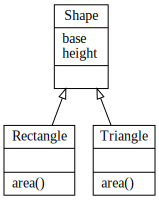

In [6]:
!pyreverse -o t4.svg t4.py
SVG('classes.t4.svg')

5. (3) Напишите программу с классом `Mother` от которого наследуется класс `Daughter`.
Сделайте так, чтобы результат `print(object)` был разный.
Воспользуйтесь принципами полиморфизма, наследования и инкапсуляции.

In [7]:
%%writefile t5.py

class Mother:
    __name = "unknown"

    def __init__(self, name):
        self.__name = name

    def get_name(self):
        return self.__name

    def set_name(self, name):
        self.__name = name

    def get_str(self):
        return f"Name: {self.get_name()}\n---"
    
    def __str__(self):
        return self.get_str()


class Daughter(Mother):
    __mother = "unknown"
    
    def __init__(self, name, mother):
        super().__init__(name)
        self.__mother = mother
    
    def get_mother(self):
        return self.__mother
    
    def set_mother(self, mother):
        self.__mother = mother

    def get_str(self):
        return f"Name: {self.get_name()}; Mother: {self.get_mother()}\n---"


Overwriting t5.py


In [8]:
import t5
t5 = reload(t5)

m = t5.Mother("Agatha")
d = t5.Daughter("Elsa", "Agatha")

print(m)
print(d)

Name: Agatha
---
Name: Elsa; Mother: Agatha
---


parsing t5.py...


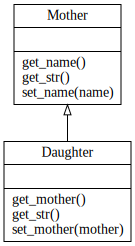

In [9]:
!pyreverse -o t5.svg t5.py
SVG('classes.t5.svg')

---
6. (4) Реализйте класс `Animal`. Внутри объявите поле для имени и возраста.
От класса `Animal` унаследуйте класс `Zebra` и `Dolphin`.
Оба класса могут вернуть описание, содержащее имя, возраст и какую-то доп.информацию, например, что это за вид животного.
Воспользуйтесь принципами полиморфизма, наследования и инкапсуляции.

In [13]:
%%writefile t6.py

class Animal:
    __name = "unknown"
    __age = "unknown"
    __description = "-"

    def __init__(self, name, age):
        self.__name = name
        self.__age = age

    def get_name(self):
        return self.__name
    
    def get_age(self):
        return self.__age
    
    def get_description(self):
        return self.__description
    
    def set_description(self, description):
        self.__description = description

    def __str__(self):
        return self.get_str()


class Zebra(Animal):
    __number_of_legs = 4
    
    def __init__(self, name, age, number_of_legs):
        super().__init__(name, age)
        self.__number_of_legs = number_of_legs
        
    def get_legs(self):
        return self.__number_of_legs
    
    def get_str(self):
        return f"Name: {self.get_name()}; Age: {self.get_age()}; \
                        N of legs: {self.get_legs()}\n---"


class Dolphin(Animal):
    def get_str(self):
        return f"Name: {self.get_name()}; Age: {self.get_age()};\n---"
    
    
    def swim_across_the_ocean(self):
        print('Swimming...')
    pass

# z = Zebra("Zebra1", "118", number_of_legs=5)
# z.set_description("This is Zebra1 - the best zebra there is. It has 5 legs!")

# d = Dolphin("Jonny", "4")
# d.set_description("This is Dolphin Jonny - he is 5yr old.")

# print(z)
# print(d)

Overwriting t6.py


In [14]:
import t6
t6 = reload(t6)

z = t6.Zebra("Zebra1", "118", 5)
z.set_description("This is Zebra1 - the best zebra there is. It has 5 legs!")

d = t6.Dolphin("Jonny", "4")
d.set_description("This is Dolphin Jonny - he is 5yr old.")

print(z)
print(d)
d.swim_across_the_ocean()

Name: Zebra1; Age: 118;                         N of legs: 5
---
Name: Jonny; Age: 4;
---
Swimming...


parsing t6.py...


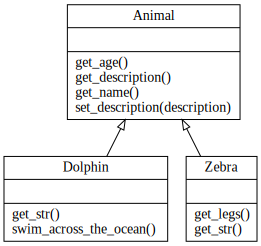

In [15]:
!pyreverse -o t6.svg t6.py
SVG('classes.t6.svg')